## **Sentiment Classification with Natural Language Processing** 

### **`What is sentiment analysis?`**


Sentiment analysis is the computational task of automatically determining what feelings a writer is expressing in text. Sentiment is often framed as a binary distinction (positive vs. negative), but it can also be a more fine-grained, like identifying the specific emotion an author is expressing (like fear, joy or anger).

Sentiment analysis is used for many applications, especially in business intelligence. Some examples of applications for sentiment analysis include:

* Analyzing the social media discussion around a certain topic
* Evaluating survey responses
* Determining whether product reviews are positive or negative

Sentiment analysis is not perfect, and as with any automatic analysis of language, you will have errors in your results. It also cannot tell you why a writer is feeling a certain way. However, it can be useful to quickly summarize some qualities of text, especially if you have so much text that a human reader cannot analyze all of it.

```
For this project,the goal is to to classify Food reviews based on customers' text.
```

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

<p align="center"><img src="https://miro.medium.com/max/608/0*c7wMiVrApomEnqcl.png" width="50%"/>

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/NLP/Sentiment_Analysis"

Reviews.csv  Reviews.zip  Sentiment_analysis.ipynb  SentimentAnalysis.ipynb


## **`Extract Dataset`**

In [ ]:
print("[INFO] Extracting Dataset .....")
!unzip -q "/content/drive/My Drive/Colab Notebooks/NLP/Sentiment_Analysis/Reviews.zip"

[INFO] Extracting Dataset .....


## **`Information about the dataset`**

### **The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.**

Number of reviews: 568,454 <br/>
Number of users: 256,059 <br/>
Number of products: 74,258 <br/>
Timespan: Oct 1999 — Oct 2012 <br/>
Number of Attributes/Columns in data: 10 <br/>

### **The column or features in the dataset**

1. **Id**
2. **ProductId** — unique identifier for the product
3. **UserId** — unqiue identifier for the user
4. **ProfileName**
5. **HelpfulnessNumerator** — number of users who found the 
review helpful
6. **HelpfulnessDenominator** — number of users who indicated whether they found the review helpful or not
7. **Score** — rating between 1 and 5
8. **Time** — timestamp for the review
9. **Summary** — brief summary of the review
10. **Text** — text of the review



## **`Loading the dataset`**


In [ ]:
df = pd.read_csv('Reviews.csv')

In [ ]:
df.shape

(568454, 10)

In [ ]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [ ]:
df=df[:10000]

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape

(10000, 10)


## **`Text Cleaning or Preprocessing`**

The entire process of cleaning and stardardization of text, making it noise free and ready for analysis is known as text preprocessing.

* **Noise removal**:

    Any peice of text which is not relevent to the context of the data and the end output can be specified as the noise

    for example : language stopwords (commonly used words of a language - is,am, the, of , in etc), URL's or links, social media entities (mention,hashtags), punctuations and industry specific words

* **Lexicon normalization**

  Another type opf textual noise is about the multiplt representation exhibited by single word.

  for example - "play","player","played","plays" and "playing" are the diiferent variation of the word - "play"

  the most common lexicon normalization practices are 

  1. **stemming**

    Stemming is the process of reducing inflection in words (e.g. troubled, troubles) to their root form (e.g. trouble). The “root” in this case may not be a real root word, but just a canonical form of the original word.

    <img src="https://cdn-images-1.medium.com/max/1600/1*9KLZmtSh-t6SfEGX_nbznA.png" width="60%"/>

  2. Lemmatization

    Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form. The only difference is that, lemmatization tries to do it the proper way. It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”.

    <img src="https://cdn-images-1.medium.com/max/1600/1*z4f7My5peI28lNpZdHk_Iw.png" width="80%"/>

### **Stopwords**

As mentioned earlier, stopwords are very common words. Words like “we” and “are” probably do not help at all in NLP tasks such as sentiment analysis or text classifications. Hence, we can remove stopwords to save computing time and efforts in processing large volumes of text.



In [ ]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 10000):
    
    # here we are only dealing with text not any other special charachter
    review = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    
    # convert all text in lower case 
    review = review.lower()

    review = review.split()

    # stemming
    ps = PorterStemmer()

    # stemming each word excluding stopword
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=pd.DataFrame(corpus, columns=['Reviews']) 
corpus.head()

,Reviews
0,bought sever vital can dog food product found ...
1,product arriv label jumbo salt peanut peanut a...
2,confect around centuri light pillowi citru gel...
3,look secret ingredi robitussin believ found go...
4,great taffi great price wide assort yummi taff...


We are only dealing with "reviews" and score column 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


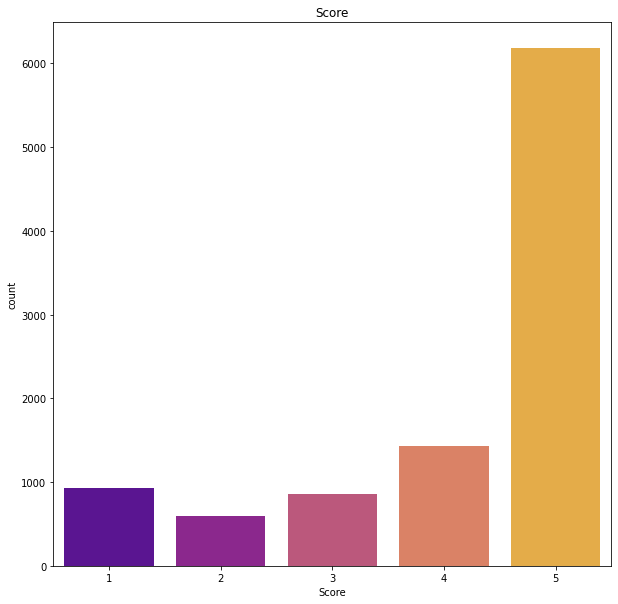

In [ ]:
import seaborn as sns
sns.countplot(df['Score'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Score')
plt.show()

In [ ]:
result=corpus.join(df[['Score']])
result.head()

,Reviews,Score
0,bought sever vital can dog food product found ...,5
1,product arriv label jumbo salt peanut peanut a...,1
2,confect around centuri light pillowi citru gel...,4
3,look secret ingredi robitussin believ found go...,2
4,great taffi great price wide assort yummi taff...,5


## **`TFIDF`**

TFIDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word has its respective TF and IDF score. The product of the TF and IDF scores of a word is called the TFIDF weight of that word.

Put simply, the higher the TFIDF score (weight), the rarer the word and vice versa

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(result['Reviews'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
X = tfidf.transform(result['Reviews'])
result['Reviews'][1]

'product arriv label jumbo salt peanut peanut actual small size unsalt sure error vendor intend repres product jumbo'

In [ ]:
# Here 1 represent 1st row, tfidf value of word "peanut" is 0.375

print([X[1, tfidf.vocabulary_['peanut']]])

[0.37509695630835344]


In [ ]:
print([X[1, tfidf.vocabulary_['jumbo']]])

[0.5727828521365451]


In [ ]:
print([X[1, tfidf.vocabulary_['error']]])

[0.2706003734708304]


Among the three words, “peanut”, “jumbo” and “error”, tf-idf gives the highest weight to “jumbo”. Why? This indicates that “jumbo” is a much rarer word than “peanut” and “error”. This is how to use the tf-idf to indicate the importance of words or terms inside a collection of documents.

## **`Sentiment Classification`**

In [ ]:
# Remove null values
result.dropna(inplace=True)

# We are removing neutral score  
result[result['Score'] != 3]

# if score value is greater then 3 , we mark it as "positive" i.e 1
# else we mark it has "negative" i.e 0

result['Positivity'] = np.where(result['Score'] > 3, 1, 0)
cols = [ 'Score']

# As we don't need score column , so we removing that column
result.drop(cols, axis=1, inplace=True)

# print the top 5 value
result.head()

,Reviews,Positivity
0,bought sever vital can dog food product found ...,1
1,product arriv label jumbo salt peanut peanut a...,0
2,confect around centuri light pillowi citru gel...,1
3,look secret ingredi robitussin believ found go...,0
4,great taffi great price wide assort yummi taff...,1


In [ ]:
result.tail()

,Reviews,Positivity
9995,switch advanc similac organ product think woul...,0
9996,like bad review say organ formula constip daug...,1
9997,want sole breastfe unabl keep supplement formu...,1
9998,love fact get deliev hous delievi charg hard f...,1
9999,week old ga constip problem first week tri two...,1


In [ ]:
# Total number of positive and negative comment are 7616 and 2384
result.groupby('Positivity').size()

Positivity
0    2384
1    7616
dtype: int64

## **`Train Test Split`**

In [ ]:
from sklearn.model_selection import train_test_split

X = result.Reviews
y = result.Positivity

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),
                                                                             (len(X_train[y_train == 0]) / (len(X_train)*1.))*100,
                                                                            (len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

Train set has total 7500 entries with 23.57% negative, 76.43% positive


In [ ]:
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_test),
                                                                             (len(X_test[y_test == 0]) / (len(X_test)*1.))*100,
                                                                            (len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

Test set has total 2500 entries with 24.64% negative, 75.36% positive


Here we can see that our classes are imbalanced, and the ratio of negative to positive instance is 22:78

One of the tactics of combining imbalance classes is using **Decision tree algorithm**, so we are using **Random forest classifier** to learn imbalanced data and set class_weight=balanced

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [ ]:
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,25001,5000)

def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Test result for 10000 features
accuracy score: 84.32%
Test result for 15000 features
accuracy score: 83.60%
Test result for 20000 features
accuracy score: 83.96%
Test result for 25000 features
accuracy score: 83.32%


## **Confusion matrix**

Confusion matrix is a table that is often used to describe the performance of a classification model on a set of the test data for which the true values are known.

<p align="center"><img src="https://miro.medium.com/max/700/1*pOtBHai4jFd-ujaNXPilRg.png"/></p>


**Accuracy** : Accuracy is the most intuitive performance measure and it is simple a ratio of correctly predicted observation to the total observations

**Precision** : Precision is the ratio of correctly predicted positive observation to the total predicted positive observations.

**Recall (Sensitiviy)** - Recall is the ratio of correctly predicted positive observation to all observation in the actual class

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7500,)
(7500,)
(2500,)
(2500,)


In [ ]:
X_train[:3]

2967    disappoint receiv shipment seawe contain msg l...
700     plocki red bean rice tortilla chip realli tast...
3481    got keurig brewer last month bought two differ...
Name: Reviews, dtype: object

In [ ]:
from sklearn.metrics import classification_report

cv = CountVectorizer(max_features=30000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.94      0.34      0.50       616
    positive       0.82      0.99      0.90      1884

    accuracy                           0.83      2500
   macro avg       0.88      0.67      0.70      2500
weighted avg       0.85      0.83      0.80      2500



In [ ]:
## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = pipeline, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.83 (+/- 0.01)


### **Prediction**

In [ ]:
print(sentiment_fit.predict(['I love Angle hair pasta and this recipe is so amazing','The pasta is worst , I will not eat them again']))

[1 0]


Here we can see that model is working perfectly , output 1 indicate positive review where 0 indicate negative review